In [1]:
import matplotlib.pyplot as plt # python graphing library
import numpy as np              # python library for vector/array manipulations
import os                       # interact with the operating system
import pandas as pd             # DataFrame programming in python
from collections import Counter # Tool to track frequencies of items in arrays (lists, sets, etc.)
from pprint import pprint       # "pretty printing" of arrays, dictionaries and JSON objects
from pylab import *             # imaging 

# allow plots to appear in this notebook
%matplotlib inline              
plt.rcParams['figure.figsize'] = 10, 8 # size of plots

In [2]:
!ls ../..

R         README.md TODO.txt  data      python


In [3]:
DATA_PATH = '../../data/dev/'

In [4]:
os.listdir(DATA_PATH) # Files in the DATA_PATH directory

['climatic_variables_longlat_var.csv', 'README.rmd']

In [5]:
clim = pd.read_csv(DATA_PATH + 'climatic_variables_longlat_var.csv')
clim = clim.iloc[:, 1:] # Drop Unnamed: 0 (row index from R: write.csv())

In [6]:
print(clim.shape)
clim.head()

(999, 682)


,x,y,lon,lat,mask,etopo1,srtm30,mat_slice_msk,vgt_mat_msk,btl_mat_msk,...,btl_vgp_msk.11,vgp_slice_msk.12,vgt_vgp_msk.12,btl_vgp_msk.12,vgp_slice_msk.13,vgt_vgp_msk.13,btl_vgp_msk.13,vgp_slice_msk.14,vgt_vgp_msk.14,btl_vgp_msk.14
0,2690000.0,-4510000,-77.292019,5.124395,1,67,78,25.471111,NaN,NaN,...,NaN,0.130108,NaN,NaN,0.470960,NaN,NaN,0.138894,NaN,NaN
1,2700000.0,-4510000,-77.208582,5.099891,1,61,39,25.745397,NaN,NaN,...,NaN,0.147560,NaN,NaN,0.493110,NaN,NaN,0.147905,NaN,NaN
2,2710000.0,-4510000,-77.125153,5.075297,1,67,52,25.771355,NaN,NaN,...,NaN,0.153884,NaN,NaN,0.488933,NaN,NaN,0.152029,NaN,NaN
3,2720000.0,-4510000,-77.041733,5.050615,1,26,22,26.047372,NaN,NaN,...,NaN,0.160750,NaN,NaN,0.485937,NaN,NaN,0.158797,NaN,NaN
4,2730000.0,-4510000,-76.958322,5.025843,1,43,79,25.815113,NaN,NaN,...,NaN,0.171550,NaN,NaN,0.490959,NaN,NaN,0.168400,NaN,NaN


# Eliminate column redundancy

**Variable key**
* `cpja:`&nbsp;&nbsp;&nbsp;cumulative precipitation from June to August in current and previous year; use precipitation data in the previous and current year
* `cpos:`&nbsp;&nbsp;&nbsp;cumulative precipitation from October to September in current and previous year
* `gsp:`&nbsp;&nbsp;&nbsp;&nbsp;growing season precipitation in current year
* `map:`&nbsp;&nbsp;&nbsp;&nbsp;mean annual precipitation; use precipitation data from January to December in the past five years
* `mat:`&nbsp;&nbsp;&nbsp;&nbsp;annual mean monthly average of daily mean temperature in the past year
* `mta:`&nbsp;&nbsp;&nbsp;&nbsp;monthly average of daily mean temperature in August
* `mtaa:`&nbsp;&nbsp;&nbsp;mean of monthly average of daily mean temperature from April to August
* `ntj:`&nbsp;&nbsp;&nbsp;&nbsp;monthly average of daily minimum temperature in January
* `ntm:`&nbsp;&nbsp;&nbsp;&nbsp;monthly average of daily minimum temperature in March
* `nto:`&nbsp;&nbsp;&nbsp;&nbsp;monthly average of daily minimum temperature in October
* `ntw:`&nbsp;&nbsp;&nbsp;&nbsp;minimum of monthly average of daily minimum temperature between Dec and Feb
* `pja:`&nbsp;&nbsp;&nbsp;&nbsp;precipitation from June to August in previous year
* `pos:`&nbsp;&nbsp;&nbsp;&nbsp;precipitation from October to September in previous year
* `vgp:`&nbsp;&nbsp;&nbsp;&nbsp;variability of growing season precipitation
* `xta:`&nbsp;&nbsp;&nbsp;&nbsp;monthly average of daily maximum temperature in August

In [7]:
# Reorganize columns in alphabetic order
sorted_cols = sorted(list(clim))
clim = clim[sorted_cols]
clim.head()

,btl_cpja_msk,btl_cpja_msk.1,btl_cpja_msk.10,btl_cpja_msk.11,btl_cpja_msk.12,btl_cpja_msk.13,btl_cpja_msk.14,btl_cpja_msk.2,btl_cpja_msk.3,btl_cpja_msk.4,...,xta_slice_msk.14,xta_slice_msk.2,xta_slice_msk.3,xta_slice_msk.4,xta_slice_msk.5,xta_slice_msk.6,xta_slice_msk.7,xta_slice_msk.8,xta_slice_msk.9,y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.876667,29.226667,29.976667,28.776666,29.426666,29.176667,28.176667,29.326667,30.876667,-4510000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.199392,29.568858,30.325272,29.121031,29.820832,29.525585,28.527974,29.675272,31.221130,-4510000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.303671,29.711732,30.426127,29.242350,30.013458,29.654233,28.691666,29.776126,31.313642,-4510000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.707875,30.153704,30.826926,29.665251,30.506019,30.081989,29.157751,30.176926,31.706099,-4510000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.612004,30.094766,30.727668,29.589740,30.498513,30.008847,29.126240,30.077667,31.598499,-4510000


In [8]:
col_split = [col.split('_') for col in list(clim)]
prefixes, remainders = ([cs[0] for cs in col_split], 
                        ['_'.join(cs[1:]) for cs in col_split])
prefixes = set(prefixes)
print('Total remainders:', len(remainders))
unique_remainders = set(sorted(remainders))
print('Unique remainders:', len(unique_remainders))

prefixes = sorted(list(prefixes))    
print('\nPrefixes:\n', prefixes)

for pref in prefixes:
    print('\n\n' + pref + '_')
    for col in list(clim):
        if col.startswith(pref):
            #print('%15s' % '_'.join(col.split('_')[1:]), end='')
            print('{:<15s}'.format('_'.join(col.split('_')[1:])), end='')

Total remainders: 682
Unique remainders: 241

Prefixes:
 ['btl', 'cpja', 'cpos', 'etopo1', 'gsp', 'lat', 'lon', 'map', 'mask', 'mat', 'mta', 'mtaa', 'ntj', 'ntm', 'nto', 'ntw', 'pja', 'pos', 'srtm30', 'vgp', 'vgt', 'x', 'xta', 'y']


btl_
cpja_msk       cpja_msk.1     cpja_msk.10    cpja_msk.11    cpja_msk.12    cpja_msk.13    cpja_msk.14    cpja_msk.2     cpja_msk.3     cpja_msk.4     cpja_msk.5     cpja_msk.6     cpja_msk.7     cpja_msk.8     cpja_msk.9     cpos_msk       cpos_msk.1     cpos_msk.10    cpos_msk.11    cpos_msk.12    cpos_msk.13    cpos_msk.14    cpos_msk.2     cpos_msk.3     cpos_msk.4     cpos_msk.5     cpos_msk.6     cpos_msk.7     cpos_msk.8     cpos_msk.9     gsp_msk        gsp_msk.1      gsp_msk.10     gsp_msk.11     gsp_msk.12     gsp_msk.13     gsp_msk.14     gsp_msk.2      gsp_msk.3      gsp_msk.4      gsp_msk.5      gsp_msk.6      gsp_msk.7      gsp_msk.8      gsp_msk.9      map_msk        map_msk.1      map_msk.10     map_msk.11     map_msk.12     map_msk.13 

In [9]:
#list(zip(clim['vgt_ntj_msk.9'], clim['btl_ntj_msk.9']))[:50]

In [10]:
solos = ['etopo1', 'lat', 'lon', 'mask', 'srtm30', 'y']
redundant = []

for remainder in unique_remainders:
    first_instance = None
    first_instance_name = None
    
    for col in list(clim):    
        if col not in solos and '_'.join(col.split('_')[1:]) == remainder:
            if first_instance is None:
                first_instance = clim[col]
                first_instance_name = col
            else:
                if clim[col].all() == first_instance.all():
                    #print('%s same as %s, adding to redundant list' 
                    #      % (col, first_instance_name))
                    redundant.append(col)

In [11]:
print(len(redundant))

435


In [12]:
print('Original data set shape:', clim.shape)
clim = clim.drop(redundant, axis=1)
print('Data set shape after eliminating redundancy:', clim.shape)

Original data set shape: (999, 682)
Data set shape after eliminating redundancy: (999, 247)


# Restrict Data to Bounding Box to Eliminate Unused Data

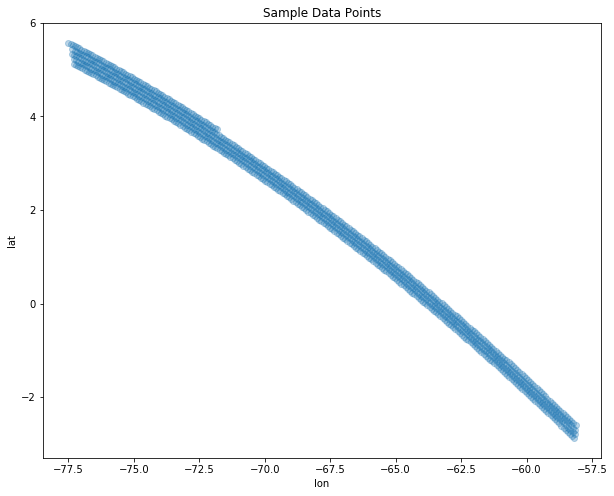

In [13]:
plt.plot(clim.lon, clim.lat, 'o', alpha=0.3);
plt.title('Sample Data Points');
plt.xlabel('lon');
plt.ylabel('lat');

In [46]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return '(%s, %s)' % (self.x, self.y)
       
        
class BoundingBox:
    def __init__(self, lower_left, upper_right):
        assert type(lower_left) is Point and type(upper_right) is Point
        self.lower_left = lower_left
        self.upper_right = upper_right
        
    def __str__(self):
        return ('Lower left: %s; Upper right: %s' 
                % (self.lower_left, self.upper_right))

In [47]:
upper_left = Point(-75, -1)
lower_right = Point(-60, 4)
bounding_box = BoundingBox(upper_left, lower_right)

In [48]:
def restrict_to_bounding_box(data, bounding_box, coord_type='lon_lat'):
    '''
    Returns data restricted to rows enclosed in bounding box
    
    Args:
    data: Dataframe with either x and y columns, or lon and lat columns 
          (or both)
    bounding_box: BoundingBox
    coord_type: 'lon_lat' or 'xy' - tells which fields to use to filter 
                data
    
    Returns: DataFrame
    '''
    assert coord_type in ['lon_lat', 'xy']
    x_min = bounding_box.lower_left.x
    y_min = bounding_box.lower_left.y
    x_max = bounding_box.upper_right.x
    y_max = bounding_box.upper_right.y    
    x, y = ('x', 'y') if coord_type == 'xy' else ('lon', 'lat')

    return data[(x_min <= data[x]) & (data[x] <= x_max) & 
                (y_min <= data[y]) & (data[y] <= y_max)]

In [49]:
sample = restrict_to_bounding_box(clim, bounding_box)

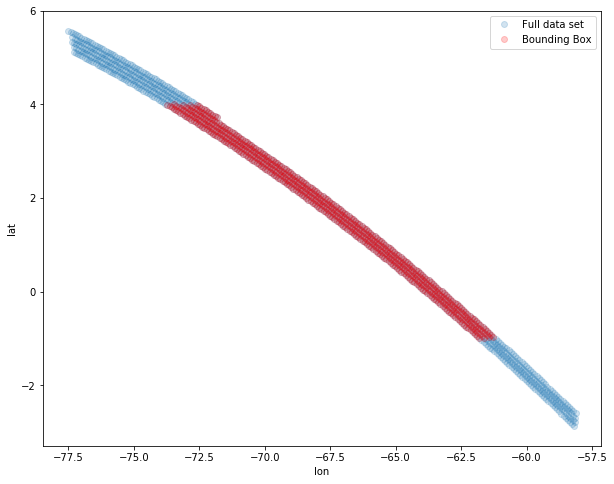

In [50]:
plt.plot(clim.lon, clim.lat, 'o', alpha=0.2, label='Full data set');
plt.plot(sample.lon, sample.lat, 'ro', alpha=0.2, label='Bounding Box');
plt.xlabel('lon');
plt.ylabel('lat');
plt.legend(loc='upper right');

In [51]:
def column2matrix(df, column, cell_dim=10000):
    '''
    Convert a column from DataFrame df into a matrix representation with the upper-left cell 
    indexing beginning at [0, 0].
    It is expected that the DataFrame has columns x and y.
    
    Args:
    df: DataFrame: the source data
    column: string: the column name to extract
    cel_dim: numeric: the dimensions of each grid cell
    
    Returns: np.ndarray (a 2D list; matrix)
    '''
    
    xs = sorted(df.x.unique())
    ys = sorted(df.y.unique())
    matrix = np.array([[np.nan for y in range(len(ys))] for x in range(len(xs))])

    for row in range(df.shape[0]):
        x, y, value = df.loc[row, ['x', 'y', column]]
        i = int((x - xs[0]) / cell_dim)
        j = int((y - ys[0]) / cell_dim)
        matrix[i, j] = value
        
    return matrix

In [52]:
etopo_matrix = column2matrix(clim, 'etopo1')
etopo_matrix

array([[  nan,   nan,   nan,   nan,   72.],
       [  nan,   nan,   nan,   nan,  268.],
       [  nan,   nan,   81.,  305.,  446.],
       ..., 
       [  71.,   94.,   85.,   67.,   nan],
       [  13.,   40.,  101.,   80.,   nan],
       [   8.,   54.,   81.,   20.,   nan]])

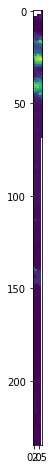

In [53]:
imshow(etopo_matrix); 

In [54]:
def get_beetle_bounding_box(df, btl_mask_column='btl_mat_msk.2'):
    beetle_mask = np.isnan(df[btl_mask_column] == False)
    beetle_df = df.loc[beetle_mask, :]
    lower_left = Point(beetle_df.x.min(), beetle_df.y.min())
    upper_right = Point(beetle_df.x.max(), beetle_df.y.max())
    return BoundingBox(lower_left, upper_right)

In [55]:
bb = get_beetle_bounding_box(clim)
print(bb)

Lower left: (nan, nan); Upper right: (nan, nan)
